DB Index: 0.8740803966716175


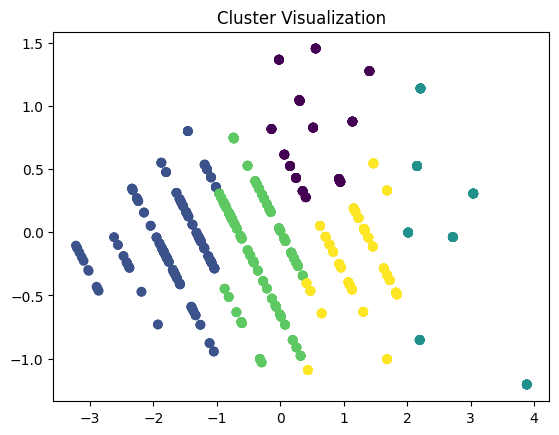

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data
customers = pd.read_csv(r'C:\Users\HP\Downloads\Customers.csv')
transactions = pd.read_csv(r'C:\Users\HP\Downloads\Transactions.csv')
# Merge data on CustomerID
data = pd.merge(transactions, customers, on='CustomerID')

# Feature Engineering (e.g., Total Spend, Frequency of Purchase, etc.)
data['Total Spend'] = data.groupby('CustomerID')['TotalValue'].transform('sum')
data['Frequency of Purchase'] = data.groupby('CustomerID')['TransactionID'].transform('count')

# Select features for clustering
features = data[['Total Spend', 'Frequency of Purchase']]  # Add more features as needed

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Evaluate using DB Index
db_index = davies_bouldin_score(features_scaled, data['Cluster'])
print(f'DB Index: {db_index}')

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'])
plt.title('Cluster Visualization')
plt.show()

# Save results to CSV
data[['CustomerID', 'Cluster']].to_csv('Clustered_Customers.csv', index=False)
